https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/  
http://andyljones.tumblr.com/post/111299309808/why-word2vec-works  

In [ ]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from __future__ import print_function, division

import matplotlib
% matplotlib inline

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# import seaborn as sns

# import pickle


/Users/hrm/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
recipeSuggesterFolder = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/recipe_suggestor_files/'
picklesFolder = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/bbc_goodfood_recipes_pickles/'

In [4]:
# DF = pd.read_csv(recipeSuggesterFolder + 'BBCgoodfood_10081recipes.csv', index_col=0 )
# DF = pd.read_pickle(picklesFolder + 'BBCgoodfood_10081recipes.pkl')
DF = pd.read_pickle(picklesFolder + 'BBCgoodfood_10081recipes0.pkl')

In [ ]:
# DF.shape

In [5]:
DF

,title,prepTime,cookTime,prepInfo,recipeInfo,recpYield,prepDifficulty,ingred,method,authorInfo,Nraters,Ratings,imgURL
0,Lemon drizzle cake,15.0,45.0,None,freezable,Cuts into 10 slices,Easy,"[225g unsalted butter, softened, 225g caster s...",Heat oven to 180C/fan 160C/gas 4. Beat togethe...,Tana Ramsay,1455,4.689520,http://www.bbcgoodfood.com/sites/default/files...
1,Chilli con carne,70.0,NaN,None,freezable,Serves 4,Easy,"[1 tbsp oil, 1 large onion, 1 red pepper, 2 ga...",Prepare your vegetables. Chop 1 large onion in...,Good Food,1007,4.764150,http://www.bbcgoodfood.com/sites/default/files...
2,Ultimate chocolate cake,40.0,90.0,Plus baking and cooling time,freezable,Cuts into 14 slices,Easy,"[200g good quality dark chocolate, about 60% c...",Butter a 20cm round cake tin (7.5cm deep) and ...,Angela Nilsen,971,4.695415,http://www.bbcgoodfood.com/sites/default/files...
3,Best-ever brownies,NaN,NaN,"Ready in 1 hour, inc cooling (worth every minute)",,Cuts into 16 squares or 32 triangles,More effort,"[185g unsalted butter, 185g best dark chocolat...",Cut 185g unsalted butter into smallish cubes a...,Orlando Murrin,803,4.809155,http://www.bbcgoodfood.com/sites/default/files...
4,Yummy scrummy carrot cake,75.0,NaN,Including 40-45 minutes in the oven.,"freezable, dairy-free",Cuts into 15 slices,Easy,"[175g light muscovado sugar, 175ml sunflower o...",Preheat the oven to 180C/Gas 4/fan 160C. Oil a...,Mary Cadogan,789,4.668885,http://www.bbcgoodfood.com/sites/default/files...
5,Chicken & chorizo jambalaya,10.0,45.0,None,healthy,Serves 4,Easy,"[1 tbsp olive oil, 2 chicken breast, chopped, ...",Heat the oil in a large frying pan with a lid ...,Good Food,685,4.747080,http://www.bbcgoodfood.com/sites/default/files...
6,Spiced carrot & lentil soup,10.0,15.0,None,"freezable, vegetarian, dairy-free",Serves 4,Easy,"[2 tsp cumin seeds, pinch chilli flakes, 2 tbs...",Heat a large saucepan and dry-fry the cumin se...,Jane Hornby,600,4.555835,http://www.bbcgoodfood.com/sites/default/files...
7,Spicy root & lentil casserole,10.0,35.0,None,"vegetarian, healthy",Serves 4,Easy,"[2 tbsp sunflower or vegetable oil, 1 onion, c...",Heat the oil in a large pan and cook the onion...,Good Food,539,4.592765,http://www.bbcgoodfood.com/sites/default/files...
8,Summer-in-winter chicken,NaN,NaN,Ready in 25 mins,,Serves 4,Easy,"[1 tbsp olive oil, 4 boneless skinless chicken...","Heat the oil in a frying pan, preferably non-s...",Mary Cadogan,516,4.436045,http://www.bbcgoodfood.com/sites/default/files...
9,Classic scones with jam & clotted cream,5.0,10.0,None,"freezable, doubled-halved",Serves 8,Easy,"[350g self-raising flour, plus more for dustin...",Heat oven to 220C/fan 200C/gas 7. Tip the flou...,Jane Hornby,474,4.837025,http://www.bbcgoodfood.com/sites/default/files...


In [6]:
DF.ingred[1000]

['large knob of butter',
 '2 large leeks, halved and finely sliced',
 '1 bay leaf',
 '1kg floury potatoes, diced',
 '1l chicken or vegetable stock',
 '100ml double cream',
 '200g smoked salmon, cut into strips',
 'small bunch chives, snipped']

In [5]:
DF.prepDifficulty.value_counts()

Easy           8485
More effort    1370
A challenge     226
Name: prepDifficulty, dtype: int64

In [ ]:
# DF.recipeInfo.map(lambda x: ', '.join(x)).value_counts()

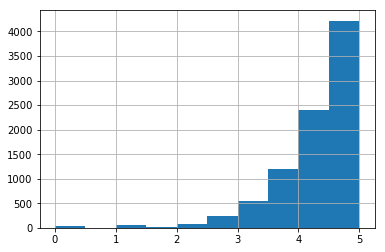

In [8]:
DF.Ratings.hist();

In [ ]:
DF.ingred[0]

In [ ]:
DF.ingred[333]

In [ ]:
DF.ingred[1000]

In [ ]:
# DF.ingred[0], DF.ingred[1], DF.ingred[10]

In [ ]:
DF.method[1]

In [ ]:
DF.title[1]

In [9]:
import os
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
# lmtzr = WordNetLemmatizer()

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from gensim import utils
from gensim import corpora, summarization, models, similarities, matutils 

In [10]:
from stop_words import get_stop_words

en_stop_words = get_stop_words('english')
# en_stop_words

# import nltk
# from nltk.corpus import stopwords
# stops = set(stopwords.words('english'))

In [11]:
cvec = CountVectorizer(stop_words='english')

In [12]:
cvec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
# DF.ingred.map(lambda x: ', '.join(x))

In [14]:
# word_counts = cv.fit_transform(doc_list)
word_counts = cvec.fit_transform(DF.ingred.map(lambda x: ', '.join(x)))
# word_counts = cvec.fit_transform(DF.ingred)

In [16]:
word_counts

<10081x4215 sparse matrix of type '<class 'numpy.int64'>'
	with 305932 stored elements in Compressed Sparse Row format>

In [17]:
wordcountDF = pd.DataFrame(word_counts.todense(),columns=cvec.get_feature_names(),index=DF.title)

In [18]:
wordcountDF

,00,10,100,100g,100m,100ml,105g,10cm,10fl,10g,...,½cm,½fl,½in,½oz,½pint,½tsp,½x200g,¾in,¾pint,évêque
title,,,,,,,,,,,,,,,,,,,,,
Lemon drizzle cake,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chilli con carne,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ultimate chocolate cake,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Best-ever brownies,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yummy scrummy carrot cake,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chicken & chorizo jambalaya,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spiced carrot & lentil soup,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spicy root & lentil casserole,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Summer-in-winter chicken,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# wordcountDF.T

In [ ]:
# wordcountDF.sum()

In [ ]:
# wordcountDF.sum().sort_values(ascending=False)

In [27]:
# [str(i) for i in (range(1000))]
# fractions = ['½','¾']
# list(wordcountDF.columns[:489])

In [19]:
words2ignore=[]
words2ignore.extend(list(wordcountDF.columns[:487]))
words2ignore.extend(list(wordcountDF.columns[-13:]))
words2ignore.extend([str(i) for i in (range(1000))])
words2ignore.extend(['½','¼','¾','⅓','1-2','2-3','3-4','3-5','4-6','5-8','8-12' ,'10-15','357','60-70',
                     'about350g','225-350g','‘00’','500-600g', '50-100',
                     '2-3cm','3-4cm/1','3-4cm/1¼in','/3½','85-100g/3-4oz','cm-2cm',
                     '5-6','4-8','12-14','/2½', '5-7','1-2cm','15-20g','int','di','/','', '150-300ml/¼-½',
                     '18-23cm','175-200ml','1-liter','100-125ml/3½-4fl','sachet/1½','ml/7', 'one-third',
                     '850ml-1.2litres/1½-2pts','350-400g/12-14oz', 'kg/7lb','‘','12-16','14-16','24-30','3-4cm',
                     '1½-2','8oz-6lb','375-400g','6-7','6-9','320g-400g','kg/3lb','10oz-9lb','16-20','400-500ml', 
                     '175-200g/6-8oz','100-150ml', '140-175g/5-6oz', '225-280g', 'kg/5lb',
                     'kg/3lb','litres/3', 'frac13','300-340g', 'kg-2.7kg/5lb',
                     '50-60g','350-400g','400-500g','2-3tbsp','½-1,10-12','instant,4-5' ,
                     'chop,6-8', 'woody,8-10,2-4','30-40', 'in-long','1-litre' ,'fl' , 
                     '680g-700g','¼-1','4-5cm','1-1½kg/2lb','cm-piece',
                     '700g-800g' , '-2kg/3lb' ,'¼-½','pkts','£1','5oz-1lb','400-450g','18-20',
                     '2-3mm','1½-2kg/3lb','450-500g/1lb-1lb','1.2-1.4l/2-2½', '1.8-2kg','500-600g/1lb',
                     '12oz-2lb','/1½','mix-','500-600g/1lb','300-350g','4-5g','150-200g','/1',
                     '500g-600g','litre/1½-1¾pts','24-hole','280g-350g/10-12oz','kg/3-3½lb','5-5½',
                     '250-300g','2cm-thick','-5.6kg/10-12lb','850ml-1','35-40','16-18','50-85g/2-3oz',
                     '22-23cm' ,'-6kg/10-13lb','500-600g','25-50g/1-2', '200g-300g/7oz-11oz','/2lb',
                     'litre/1½','280g-350g/10-12oz','250-300g','5-5½', 'kg/3-3½lb','12-18','cm/3in',
                     '10oz-2lb','12-15','10oz-2lb','2cm-thick', '-5.6kg/10-12lb','850ml-1','16-18',
                     '35-40','50-85g/2-3oz','30-hole','drops-','50-70','18-20cm'])

words2ignore.extend(['cm/1in','g/' ,'o','1oz','cm','x','l','ml','ml/','g','gram','grams','kg', 
                     'tsp','tbsp','%', 'pt', 'grain','800-900g/1lb','5cm-piece', '200-300ml', 
                     'cans','pack','packs','pkt', 'sachet', '1cm-thick', 'sugarcube-size','2cm-piece','2cm-square',
                     'small-ish','quartered', 'unscored', 'free-range', 'unscored', 'trimming', '20cm-wide',
                     'carton','sachets','pot','pots','bag','tub','tin','jar','cube','order','barrel','thermometer',
                     'dessertspoon','sheets','sink','glass','bottle','teaspoonful', 'matchstick',
                     'topping','flavouring','cup','scant','method','tray','bundle','rack','box''canful','jug',
                     'shallow', 'disposable' , 'spoonful' ,'step' ',inch' ,'plenty', 'fry', 'end',
                     'granules/powder' ,'kg/11-12lb','in-wide', 'fine-cut', 'root','folded',
                     'dry-roasted', 'matchstick','reserved'])

                        
words2ignore.extend(['de','extra', 'huge','shop','level','large','type', 'medium','small', 'quality', 'good','fine',
                     'cut','tear','torn', 'lean','light','thin','rounds', 'splash','half','full','size', 
                     'hot','cold ','cold','top','third','hunk', 'picked','pared','broken','chunks','fillet','collar',
                     'whole','edge','blocks','smallish', 'softened', 'trimming', 'cupboard','spear','front' ,'brine', 
                     'head', 'thickest','two-thirds','half', 'largest', 'centre-cut', 'weight','finger-length', 
                     'piece', 'slithers','length','julienne','scraping', 'minimum' ,'cent', 'real','crunchy',
                     'segments','sprigs', 'little','scraps','pitted','peeled','sliced','side', 
                     'fine','grated','halved','pitted','cored','handful','handfuls','bunch','pints','lengthways',
                     'lengthwise','thin-stemmed','just-thawed','baton','finely-grated','fingertip-sized','heaped',
                     'crisp','straw','shaving','probe','rod','pen','glaze','julienned','fin','flat-leaf','bisque',
                     'wire','silicone','possible','kitchen','batch','shredded','solid','fruity' , 'peel' ,
                     'de-veined', 'cooked','uncooked','spicy', 'white-fleshed', 'tail','teaspoon',
                     'trickle','marinade', 'cooled','ripe','braising','butcher','metre','trimming',
                     'granule','cubetti','giblet','extra-lean','shorter','yellow-fleshed','scale', 'wrap','cross',
                     'country-style', 'step-by-step','skin-on','meaty', 'escalopes',
                     'nozzle' , 'sprinkling', 'lot', 'eighth', 'medium-size', 'writing', 'added','combined']) #,

words2ignore.extend(['drained','skinless','skinned','skin', 'pin-boned', 'fatty','boneless','minty', 
                     'powder', "'cheeks", 'breasts', 'peppered','shell-on','thumb-size', 'thumb-sized','pre-steamed',
                     'well-drained','well-scrubbed','young','shape','log-shaped','ready-cooked', 
                     'rolled', 'shredless', 'gluten-free','unblanched','stamp-sized',
                     'vac-pack','vacuum-packed', 'front','spear', 'bone-in', 'doily', 'unwaxed','scattering','freshy',
                     'freeze','seasoned','range','blend', 'slow','plain', 'warm', 'fast', 'grown', 'hand-hot',
                     'self','raising','acting','action','fast', 'flou', 'blood', 'tawny', 'easy', 'spotty', 'runny',
                     'skimmed','correct','active','beaten','moisture','swap','attached', 'bake', 'baking', 'easy-bake',
                     'rounded','weighed','sifted','frying','red','dusting','thickly','eating','cloudy','strongly',
                     'room', 'temperature','strongly-flavoured','reduced-salt','easy-blend','well-trimmed','temp',
                     'low-salt','co','triangle','smooth-style','quick','fast-action','weak', 'thread','frothy',
                     'home-cooked','stir-fry','toppings-','mild','‘nonpareils’','straight-to-wok', 
                     'approx','bone-in','part-boned','sauteed','one','ad', 'diagonal','chop', 'sieve',
                     'flower', 'blossom','long','ring','raw','quarter', 'quartered','drizzling','dice',
                     'scoop','sheep','excess','cavity', 'tough', 'medium-sized', 
                     'clean', 'bug', 'sharp', 'eau','amber','firm','fork','lump', 'thinner', 
                     'stir' , 'dripping', 'skinny', 'mine','cheek' ,'ideal','tablespoon','minimum','maximum', 
                     'mineral', 'largest', 'woody', 'concentrate', 'ready-trimmed',
                     'shallow-frying','long-ways','balloon','stips','flat','ready-roasted','deli','crown',
                     'even-sized','stewing','ready-roasted','stir-fried','stir-frying','easy-cook','low-sodium',
                     'darker', 'toasted' ,'available','try','kind','ingredient','drink', 'smoothie', 'stoned','stone',
                     'red-skinned','chewy','solid','bar','curl','least','square','edible','spread','mini',
                     'pale', 'shop-bought','hundred','extract', 'essence', 'squeeze', 'serve-',
                     'preserve', 'spreadable','log','semi','semi-dried','semi-dred',
                     'on-the-vine','vine','heritage','stewpack','content','petit','amount','leafy','sub',
                     'ready-to-roll','melted','seedless','mixed','round', 'case-','ready-made','bought','freeze-dried' ,
                     'oven-ready' ,"'goes" ,'deep','juiced', 'sparkling','drinking' ,' boiling' ,'boiled', 'pink', 
                     'bitter', 'traditional', 'kid', 'oriental', 'pickling','diced','coffee-' , '12-pack' ,'wilted', 
                     'scoop' ,'carton' ,'drizzle', 'bulb','thinky','week','new-season','good-sized' ,
                     'strong-flavoured','triangle','ripple', 'wash', 'counter','co', 'irregular',
                     'rounder', 'preserved', 'darkest','basin','un-iced', 'whip','fridge-cold','cooky',
                     'treat-size' ,'cross','sauces-', 'drops-','sprinkle','modelling',
                     'and/', '/essence']) 

words2ignore.extend(['paintbrush','poire','hen','moustache','tasty', 'optional','result','morning','replacer',
                     'expensive','insect-free', 'milld','dab','finey', 'upcycling', 
                     'detail', 'instruction', 'east-blend', 'healthfood', 'source' ,'etc','see',
                     'attractive','essential-', 'sufficient', 'megrim',
                     'curly','large-leaf','flatleaf','frond','hot-smoked','fistful','fingertip-sized',
                     'major','sustainable','disc','guide','rainbow' ,'maca', 'multicoloured',
                     'scrumpy','branch','zeast','blender','disk','butterfly','cabinet',
                     'appetite','fabulous','shade','anything','kiss',
                     'drop','-mix','wiht','essential','ak','bed', 'meal',
                     'pointy', 'ring', 'moon' ,'derinding', 'allow','waxy', 'de-stringed',
                     'pointed','trim','clemantines','drieds','doily','silver','glitter','submarine',
                     'nest','different-coloured','vegan-friendly','glue','tropical','decoration',
                     'colourful','kind','food','colouring','nest','grey','microwave',
                     'uk.iherb.com','no-added-sugar','luxury','enough','curt','taste','strong',
                     'curdling','beforehand','natural','angle','head','wrinkly','floury','underripe','new','soup',
                     'label', 'choice', 'chunky','sourced','favourite','rustic','forced','worm',
                     'need', '–' ,'flavourless', 'fishmonger', 'work', 'ra', 'hanout', 'pith', 'poi', 'pop',
                     'dog' 'cellophane' ,'equivalent','half-moon', 'tape', 'gift',
                     'candle', 'regal','baller','red-skinned', 'yellow-fleshed', 'chocolate-covered', 'natural-coloured',
                     'strength', 'box','thousand' , 'salted' , 'viola', 'globe' ,
                     'polystyrene' ,'de-bearded', 'shell' ,'feather', 'rubber', 'glove','scratching' ,'cross',
                     'chilled' ,'greasy', 'visible', 'dorsetpastry.com', 'cooky',
                     'king','tiger' ,'item', 'freezer', 'money','intact','need','end', 'fozen',
                     'moon','money', 'crystals’','equal-size','pearlescent','luxurious','p','in-thick','brik',
                     'finger-size' ,'pant-ysgawn','family', 'inner' , 'ox','fino','mugful',"you're",
                     'e.g','eg','optional-', 'volume','blob','colourless', 'florist',"'sheet'",
                     'hour','check','ice-cold','brush','dowelling','curl','10-hole','selection', 'animal' ,
                     'bear','brewed' ,'detail','overgrown','theme','allergy'])

words2ignore.extend(['bok','pak','choi','lady','fingers','finger','nam', 'pla', 'kecap', 'manis',
                     'lek','spare','ribs', 'yolk','white','bicarbonate',"Quail's",'prawn']) # | fish ]) ,#'banh' 

words2ignore.extend(en_stop_words)
words2ignore = list(np.unique(words2ignore))
# words2ignore = set(words2ignore)



# ,?'tub'
## Now that I have a list of non-ingredient words -- I could train a model to categorize words...!

# words2ignore


# 'skin','instruction', , 'lump' ,'bunch','co',,'de',
# 'pro-biotic',



# 'conference' pear
# groud == gourd bitter
# 'hulled' husk
# ox-tail !!
# ice-cream !!
# 'quail’s'
# sponge-cake !!
#egg-yolk | white
# ceps == mushrooms!! 'cep',
# kabanos == polish sausages
# vegetable 'bouillon'
# apple-'crumble'
# 'runner' beans

  


In [20]:
len(np.unique(words2ignore)) , len(words2ignore)
# list(np.unique(words2ignore))

(2420, 2420)

In [ ]:
# words2ignore.extend(['finey'])

In [ ]:
# '' == '' #True

In [ ]:
# "Quail's" in words2ignore

In [ ]:
# http://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk
# from nltk.corpus import wordnet as wn
# from nltk import pos_tag
# from textblob import TextBlob


In [ ]:
# from textblob import TextBlob
# TextBlob('zest a lemon, four 100 1/2g poppadoms and mango chutney, to serve with skinned chicken').tags

# [('zest', 'JJS'),
#  ('a', 'DT'),
#  ('lemon', 'NN'),
#  ('four', 'CD'),
#  ('100', 'CD'),
#  ('1/2g', 'CD'),
#  ('poppadoms', 'NNS'),
#  ('and', 'CC'),
#  ('mango', 'NN'),
#  ('chutney', 'NN'),
#  ('to', 'TO'),
#  ('serve', 'VB'),
#  ('with', 'IN'),
#  ('skinned', 'JJ'),
#  ('chicken', 'NN')]

In [ ]:
# TextBlob(ingredList[0]).tags
# [ TextBlob(ingredList).tags for ingredList in DF.ingred[3338]]
# TextBlob(DF.ingred[3338]).tags

In [21]:
def update_ingred(ingred, ingredtmp):
    
    if ('conference' in ingredtmp and 'pear' in ingredtmp):
        ingred = ingred + ', conference-pear'

    if ('bitter' in ingredtmp and 'gourd' in ingredtmp):
        ingred = ingred + ', bitter-gourd'
    
    if ('hulled' in ingredtmp and 'barley' in ingredtmp):
        ingred = ingred + ', hulled-barley'
        
    if ('kabanos' in ingredtmp):
        ingred = ingred + ', kabanos-sausages'

    if ('ceps' in ingredtmp ):
        ingred = ingred + ', ceps-mushroom'

    if ('runner' in ingredtmp and 'beans' in ingredtmp):
        ingred = ingred + ', runner-beans'

    if ('apple' in ingredtmp and 'crumble' in ingredtmp):
        ingred = ingred + ', apple-crumble'

    if ('vegetable' in ingredtmp and 'bouillon' in ingredtmp):
        ingred = ingred + ', vegetable-bouillon'

    if ('egg' in ingredtmp and 'white' in ingredtmp):
        ingred = ingred + ', egg-white'

    if ('egg' in ingredtmp and 'yolk' in ingredtmp):
        ingred = ingred + ', egg-yolk'

    if ('sponge' in ingredtmp and 'cake' in ingredtmp):
        ingred = ingred + ', sponge-cake'

    if ("quail’s'" in ingredtmp and 'eggs' in ingredtmp):
        ingred = ingred + ", quail’s-eggs"

    if ('ice' in ingredtmp and 'cream' in ingredtmp):
        ingred = ingred + ', ice-cream'

    if ('ox' in ingredtmp and 'tail' in ingredtmp):
        ingred = ingred + ', ox-tail'

    if ('tiger' in ingredtmp and 'prawn' in ingredtmp):
        ingred = ingred + ', tiger-prawn'

    if ('king' in ingredtmp and 'prawn' in ingredtmp):
        ingred = ingred + ', king-prawn'

    if ('jumbo' in ingredtmp and 'prawn' in ingredtmp):
        ingred = ingred + ', jumbo-prawn'

    if ('garam' in ingredtmp and 'masala' in ingredtmp):
        ingred = ingred + ', garam-masala'


    if ('bicarbonate' in ingredtmp and 'soda' in ingredtmp):
        ingred = ingred + ', bicarbonate-soda'                

    if ('self' in ingredtmp and 'raising' in ingredtmp):
        ingred = ingred + ', self-raising'

    if ('baking' in ingredtmp and 'soda' in ingredtmp):
        ingred = ingred + ', baking-soda'

    if ('corn' in ingredtmp and 'meal' in ingredtmp):
        ingred = ingred + ', corn-meal'

    if ('fast' in ingredtmp and 'action' in ingredtmp):
        ingred = ingred + ', fast-action'

    if ('pearl' in ingredtmp and 'barley' in ingredtmp):
        ingred = ingred + ', pearl-barley'


    if ('bok' in ingredtmp and 'choi' in ingredtmp):
        ingred = ingred + ', bok-choi'
    if ('pak' in ingredtmp and 'choi' in ingredtmp):
        ingred = ingred + ', pak-choi'

    if ('lady' in ingredtmp and 'fingers' in ingredtmp):
        ingred = ingred + ', lady-fingers'

    if ('nam' in ingredtmp and 'pla' in ingredtmp):
        ingred = ingred + ', nam-pla'

    if ('kecap' in ingredtmp and 'manis' in ingredtmp):
        ingred = ingred + ', kecap-manis'

    if 'poire' in ingredtmp:
        ingred = ingred + ', pear'

    if 'flou' in ingredtmp:
        ingred = ingred + ', flour'

    return ingred

In [ ]:
# ingredtmp
# ingred
# ingredList#[0]
# ingredList = DF.ingred[0]
# print([i for i in ingredList[1].split(',')])
## ['225g caster sugar']

# for ingred0 in ingredList:
#     print (ingred0)
# DF.ingred[0].replace("'",'').replace("[",'').replace("]",'')


# DF.ingred.map(lambda x: ', '.join(x))[1]

In [31]:
from textblob import TextBlob

# [ [TextBlob(ingred).tags for ingred in ingredList] for ingredList in DF.ingred[:10]]

ingredList2=[]
for ii in range(len(DF.ingred)):
    ingredList = DF.ingred[ii]
    title = DF.title[ii]
    
    if ii%1000==0:
        print('now cleaning up : ' +format(ii)+ 'th recipe..............')
    
    tmp=[]
    tmpI=[]
    for ingred0 in ingredList:
        ingredtmp = [i for i in ingred0.split(' ')]
        
        ingred = update_ingred(ingred0, ingredtmp)

        #tmp.append([s for s in TextBlob(ingred).tags if s[1] == 'NNS' or s[1] == 'NN'or s[1] == 'JJ' or s[1] == 'JJS' or s[1] == 'VBN'])
        #tmp.append([s for s in TextBlob(ingred).tags if (s[1] in ['NNS','NN','JJ','JJS','VBN','VBP','VBD','VBZ'] and s[0] not in words2ignore)])
        tmp.append([s for s in TextBlob(ingred).tags if (s[1] in ['NNS','NN','JJ','JJS'] and s[0] not in words2ignore)])
        #tmp.append([s for s in TextBlob(ingred).tags if (s[1] in ['NNS','NN','JJ','JJS'])])
 
    for ingd in tmp:
        tmpI.append(' '.join([i for i,pos in ingd if i not in words2ignore])) ## maybe doesn't matter if ingrd_row is empty
        #tmpI.append([i for i,pos in ingd if i not in words2ignore])
        
    ingredList2.append(dict(zip(['title','ingred2'], [title,tmpI])) )

DF2 = pd.DataFrame(ingredList2,columns=['title','ingred2'])
DF2['ingred0'] = DF2.ingred2.map(lambda x: ' '.join(x))

now cleaning up : 0th recipe..............
now cleaning up : 1000th recipe..............
now cleaning up : 2000th recipe..............
now cleaning up : 3000th recipe..............
now cleaning up : 4000th recipe..............
now cleaning up : 5000th recipe..............
now cleaning up : 6000th recipe..............
now cleaning up : 7000th recipe..............
now cleaning up : 8000th recipe..............
now cleaning up : 9000th recipe..............
now cleaning up : 10000th recipe..............


In [ ]:
# DF2['ingred0'] = DF2.ingred2.map(lambda x: ' '.join(x))
DF2.title[1]

In [32]:
DF2.head()

,title,ingred2,ingred0
0,Lemon drizzle cake,"[unsalted butter, caster sugar, egg, zest lemo...",unsalted butter caster sugar egg zest lemon se...
1,Chilli con carne,"[oil, onion, pepper, garlic cloves, chilli, pa...",oil onion pepper garlic cloves chilli paprika ...
2,Ultimate chocolate cake,"[dark chocolate cocoa solids, butter, instant ...",dark chocolate cocoa solids butter instant cof...
3,Best-ever brownies,"[unsalted butter, best dark chocolate, flour, ...",unsalted butter best dark chocolate flour coco...
4,Yummy scrummy carrot cake,"[muscovado sugar, oil, eggs, carrot, raisins, ...",muscovado sugar oil eggs carrot raisins zest o...


In [ ]:
# DF2 = pd.DataFrame(ingredList2,columns=['title','ingred2'])

In [ ]:
# ingredList2

In [ ]:
# tmpI

In [33]:
' '.join(DF2.ingred2[1000])

'knob butter leeks bay leaf potatoes chicken vegetable stock double cream smoked salmon strips chives'

In [35]:
tmp

[[('corn', 'NN'), ('flour', 'NN')],
 [('vegetable', 'JJ'), ('oil', 'NN')],
 [('gelatine', 'NN')],
 [('water', 'NN')],
 [('caster', 'NN'), ('sugar', 'NN')],
 [('liquid', 'NN'), ('glucose', 'NN')],
 [('egg', 'NN'), ('egg-white', 'JJ')],
 [('chilli', 'NN'), ('flakes', 'NNS')],
 [('olive', 'JJ'), ('oil', 'NN')],
 [('onion', 'NN')],
 [('rosemary', 'JJ')],
 [('garlic', 'JJ'), ('cloves', 'NNS')],
 [('courgettes', 'NNS')],
 [('vegetable', 'JJ'), ('stock', 'NN')],
 [],
 [('hazelnuts', 'NNS')]]

In [34]:
DF.ingred[3338]

['3 tbsp olive oil',
 '1 bag small mixed peppers (about 7 peppers), deseeded and cut into large chunks',
 '6 garlic cloves, chopped',
 '500g pack large button mushroom, quartered',
 '1l carton passata',
 '450ml vegetable stock',
 '2 tsp dried oregano',
 '290g jar pitted',
 '500g large courgettes, halved lengthways and thickly sliced',
 '500g pack dried penne',
 '1½ l 2¾ pints milk',
 '140g butter',
 '140g plain flour',
 '¼ whole nutmeg, finely grated',
 '300g mature cheddar, grated',
 '85g hunk old bread, torn into small pieces']

In [ ]:
tmpI[7]

In [ ]:
[' '.join([i for i,pos in tmp[8]])]

In [ ]:
for ingd in tmp:
    print([i for i,pos in ingd])
#     print([' '.join([i for i,pos in ingd])])
    tmp0=[i for i,pos in ingd]

# tmp2 =[]    
# [tmp2.extend(ii)  for ii in tmp0]

In [ ]:
# tmp2

In [ ]:
# works only with python2
# from ingredient_parser.en import parse

# parse('2 tsp cumin seed')
# {'measure': '2 tsp', 'name': 'cumin seed'}

In [ ]:
# from nltk.stem.lancaster import LancasterStemmer
# stemmer=LancasterStemmer()

# [stemmer.stem(n[0]) for n in nns]



In [ ]:
# ## probably need to lemmatize /stemming??
# from nltk.stem.lancaster import LancasterStemmer
# stemmer=LancasterStemmer()
# from nltk.stem.wordnet import WordNetLemmatizer
# lmtzr = WordNetLemmatizer()

In [ ]:
# stemmer.stem('apples')

In [ ]:
# lmtzr.lemmatize('apples')

In [ ]:
# lmtzr.lemmatize('')

In [ ]:
# from nltk.tokenize import RegexpTokenizer

# tokenizer = RegexpTokenizer(r'\w+')


In [ ]:
# wds = tokenizer.tokenize(DF.ingred[10000])
# wds = set(wds)
# # wds

In [ ]:
# wds.difference(words2ignore)

In [37]:
DF['ingredTokens'] = DF.ingred.map(lambda x: word_tokenize(' '.join(x))) 
#DF.ingred.map(lambda x: set(tokenizer.tokenize(x)))#.map(lambda x: x.difference(words2ignore))

In [38]:
DF.ingredTokens[7654]

['50g',
 'blanched',
 'hazelnuts',
 '1',
 'tbsp',
 'coriander',
 'seeds',
 '2',
 'tbsp',
 'sesame',
 'seeds',
 '1',
 'tbsp',
 'ground',
 'cumin',
 '1',
 'large',
 'butternut',
 'squash',
 '1',
 'tbsp',
 'olive',
 'oil']

In [ ]:
# DF2
# DF2.ingredTokens[0]

In [ ]:
# [lmtzr.lemmatize(i) for i in DF2.ingredTokens[0]]

In [36]:
DF2.ingred0[0].split(' ')

['unsalted',
 'butter',
 'caster',
 'sugar',
 'egg',
 'zest',
 'lemon',
 'self-raising',
 'flour',
 'juice',
 'lemons',
 'caster',
 'sugar']

In [39]:
DF2.ingred2[0]

['unsalted butter',
 'caster sugar',
 'egg',
 'zest lemon',
 'self-raising flour',
 'juice lemons',
 'caster sugar']

In [ ]:
# # [word_tokenize(i ) for i in DF2.ingred3[0]]
# [['unsalted', 'butter'],
#  ['caster', 'sugar'],
#  ['egg'],
#  ['zest', 'lemon'],
#  ['self-raising', 'flour'],
#  ['juice', 'lemons'],
#  ['caster', 'sugar']]

#### ##

In [ ]:
# DF2['ingred3'] = DF2.ingred2.map(lambda x: [_ for _ in x if _ not in words2ignore]) 

In [40]:
# DF2['ingredTokens'] = DF2.ingred2.map(lambda x: tokenizer.tokenize(' '.join(x))) 
# DF2['ingredTokens'] = DF2.ingred2.map(lambda x: [word_tokenize(i) for i in x]) 

DF2['ingredTokens'] = DF2.ingred0.map(lambda x: [' '.join(word_tokenize(i)) for i in x.split(' ')] ) 

# DF2['ingredTokens'] = DF2.ingred3.map(lambda x: word_tokenize(' '.join(x.split()))) 
# DF2['ingredTokens'] = DF2.ingred3.map(lambda x: [word_tokenize(i) for i in x]) 

In [42]:
DF2.ingredTokens.head()

0    [unsalted, butter, caster, sugar, egg, zest, l...
1    [oil, onion, pepper, garlic, cloves, chilli, p...
2    [dark, chocolate, cocoa, solids, butter, insta...
3    [unsalted, butter, best, dark, chocolate, flou...
4    [muscovado, sugar, oil, eggs, carrot, raisins,...
Name: ingredTokens, dtype: object

In [43]:
## try to remove the words2ignore AGAIN...
DF2['ingredTokens_c'] = DF2.ingredTokens.map(lambda x: [i for i in x if i not in words2ignore]) # or i != '' or (i not in words2ignore and i != '')])

In [44]:
DF2.ingredTokens_c.head()

0    [unsalted, butter, caster, sugar, egg, zest, l...
1    [oil, onion, pepper, garlic, cloves, chilli, p...
2    [dark, chocolate, cocoa, solids, butter, insta...
3    [unsalted, butter, best, dark, chocolate, flou...
4    [muscovado, sugar, oil, eggs, carrot, raisins,...
Name: ingredTokens_c, dtype: object

In [45]:
DF2.ingredTokens[10000]
# [i for i in DF2.ingredTokens[10000] if i not in words2ignore and i != '']

['cocoa',
 'butter',
 '',
 'vanilla',
 'semi-skimmed',
 'milk',
 'orange',
 '',
 'self-raising',
 'flour',
 'cocoa',
 'semi-skimmed',
 'milk',
 'vanilla',
 'eggs']

In [46]:
DF2.ingredTokens_c[10000]

['cocoa',
 'butter',
 'vanilla',
 'semi-skimmed',
 'milk',
 'orange',
 'self-raising',
 'flour',
 'cocoa',
 'semi-skimmed',
 'milk',
 'vanilla',
 'eggs']

In [ ]:
# DF2.ingredTokens2 = DF2.ingredTokens.map(lambda x: [' '.join(xx) for xx in x] )

In [ ]:
# DF2.ingredTokens2[0]

In [ ]:
# DF2['ingredTokens']

In [ ]:
# tokens = [w for w in tokens if not w in stopset]
# DF2['ingredTokens2'] = DF2.ingred2.map(lambda x: [_ for _ in x if _ not in words2ignore])

In [47]:
lmtzr = WordNetLemmatizer()

# DF2['ingredLems'] = DF2.ingredTokens2.map(lambda x: [lmtzr.lemmatize(i) for i in x]) 
# DF2['ingredLems'] = DF2.ingredTokens.map(lambda x: [[lmtzr.lemmatize(i) for i in xx] for xx in x ]) 
# DF2['ingredLems2'] = DF2.ingredLems.map(lambda x: [' '.join(i) for i in x]) 
# DF2['ingredLems3'] = DF2.ingredLems2.map(lambda x: [join(i) for i in x]) 

# DF2['ingredLems'] = DF2.ingredTokens.map(lambda x: [lmtzr.lemmatize(i) for i in x]) 
DF2['ingredLems'] = DF2.ingredTokens_c.map(lambda x: [lmtzr.lemmatize(i) for i in x]) 

# DF2['ingredLems'] = DF2.ingredTokens2.map(lambda x: [lmtzr.lemmatize(i) for i in x]) 
# DF2['ingredLems'] = DF2.ingred2.map(lambda x: [lmtzr.lemmatize(i) for i in x]) 
# DF2['ingredLems'] = DF2.ingred3.map(lambda x: [lmtzr.lemmatize(i) for i in x]) 

In [48]:
DF2.ingredLems[10000]

['cocoa',
 'butter',
 'vanilla',
 'semi-skimmed',
 'milk',
 'orange',
 'self-raising',
 'flour',
 'cocoa',
 'semi-skimmed',
 'milk',
 'vanilla',
 'egg']

In [ ]:
# ' '.join(DF2.ingredLems2[8888])

In [ ]:
# DF2.ingredLems3[8888]

In [ ]:
# DF2.ingredTokens[1111]

In [ ]:
# tt=[]
# tt.extend(DF2.ingredLems[0])
# tt.append(DF2.title[0])
# tt

In [49]:
#XXX DF2['titleNingredTockens'] = DF2.ingredLems.copy()
# DF2['titleNingredTockens'] = 

AllTmp=[]
for n in range(len(DF2)):
    tmp=[]
    tmp.extend(DF2.ingredLems[n])
    tmp.append(DF2.title[n])
    
    AllTmp.append(tmp)


In [ ]:
# AllTmp

In [52]:
DF2['titleNingredT'] = AllTmp

In [ ]:
## save DF2 --- 

# with open('BBCgoodfood_TokensNLemms4word2vec.pkl', "wb") as f:
#     pickle.dump(DF2, f)

# DF2.to_csv()

In [ ]:
# DF.columns
# Index(['title', 'prepTime', 'cookTime', 'prepInfo', 'recipeInfo', 'recpYield',
#        'prepDifficulty', 'ingred', 'method', 'authorInfo', 'Nraters',
#        'Ratings', 'ingredTokens'],
#       dtype='object')

In [ ]:
# DF['title2'] = ['\"'+i+'\"' for i in DF.title] 
# DF.title2.to_csv('bbc_titles.csv', index=False)

In [ ]:
####

In [53]:
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [86]:
# w2vTITLE = word2vec.Word2Vec(DF2.titleNingredT,size=250, min_count=0.5, window=7, workers=3, seed=2222 ) ###
# w2vTITLE = word2vec.Word2Vec(DF2.titleNingredT,size=360, min_count=0.5, window=7, workers=3, seed=2222 ) ###
w2vTITLE = word2vec.Word2Vec(DF2.titleNingredT,size=410, min_count=0.4, window=7, workers=3, seed=2222 ) 

2017-02-13 00:08:44,728 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2017-02-13 00:08:44,731 : INFO : collecting all words and their counts
2017-02-13 00:08:44,732 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-13 00:08:44,812 : INFO : PROGRESS: at sentence #10000, processed 179431 words, keeping 12663 word types
2017-02-13 00:08:44,813 : INFO : collected 12755 word types from a corpus of 181111 raw words and 10081 sentences
2017-02-13 00:08:44,814 : INFO : Loading a fresh vocabulary
2017-02-13 00:08:44,850 : INFO : min_count=0 retains 12755 unique words (100% of original 12755, drops 0)
2017-02-13 00:08:44,851 : INFO : min_count=0 leaves 181111 word corpus (100% of original 181111, drops 0)
2017-02-13 00:08:44,886 : INFO : deleting the raw counts dictionary of 12755 items
2017-02-13 00:08:44,888 : INFO : sample=0.001 downsamples 83 most-common words
2017-02-13 00:08:44,889 : INFO : downsampling leaves estimated 

In [ ]:
# http://textminingonline.com/training-word2vec-model-on-english-wikipedia-by-gensim | pickle

In [ ]:
# w2vTITLE.save('w2vTitle_s400_minC60pcent_window7.model')
# w2vTITLE.save('w2vTitle_s410_minC40pcent_window7.model')

# 2016-11-10 19:57:41,038 : INFO : saving Word2Vec object under w2vTitle_s410_minC40pcent_window7.model, separately None
# 2016-11-10 19:57:41,039 : INFO : not storing attribute cum_table
# 2016-11-10 19:57:41,039 : INFO : not storing attribute syn0norm
# 2016-11-10 19:57:41,502 : INFO : saved w2vTitle_s410_minC40pcent_window7.model

In [ ]:
w2vTITLE.wv(['chocolate'])

In [119]:
w2vTITLE.most_similar_cosmul(R)

[('pretzel', 0.9435064196586609),
 ('damson', 0.9426271319389343),
 ('orchid', 0.9399969577789307),
 ('snake', 0.9388341307640076),
 ('dark', 0.9375230669975281),
 ('inimitable', 0.9352547526359558),
 ('cocoa', 0.9323671460151672),
 ('chocolate', 0.930757462978363),
 ('treacle', 0.9300578236579895),
 ('solid', 0.9300398230552673)]

In [ ]:
# w2vTITLE.most_similar(positive=[R,'chocolate'], negative=['fish','meat','cheese','chilli'], topn=100) 

In [ ]:
w2vTITLE.most_similar(positive=[R], topn=200)

In [171]:
#80 #7654* #2222 #6666 # 9999* #2** #90 #100*^ #80* #3330** #7777* 0* 555* 4444* 1000* 8888*|| 66X 999[]
ID = 7654
R = DF2.title[ID] 
# R = DF2.title[80].split(' ')
print(R)
# w2vTITLE.most_similar(positive=[R], topn=5) 
outlist = [[i,round(v*1000)/1000] for i,v in w2vTITLE.most_similar(positive=[R], topn=500)  #topn=200
           if i not in [n for m in DF2.ingredLems for n in m] and i not in ['BBC Children in Need cupcakes']
           and v>0.76] #and v>0.76]
outlist[:5]

# Double chocolate loaf cake [80]
# [['Gravadlax temptation', 0.899],
#  ['Ubercorn ice cream cone cakes', 0.897],
#  ['Little Black Forest cakes', 0.897],
#  ['Strawberry rose Eton mess', 0.896],
#  ['Meringue nest cheesecake with mini eggs', 0.896]]


# Creamy smoked salmon, leek & potato soup [1000]
# [['Smoked wild Irish salmon with chive pancakes', 0.829],
#  ['Chicken, lentil & sweetcorn chowder', 0.827],
#  ['Scandi trout with fennel potato salad', 0.82],
#  ["John Torode's big burger", 0.812],
#  ["Smoked haddock & cheat's chips", 0.809]]


# Easy raspberry & ginger trifle cheesecake [4567]
# [['The ultimate makeover: Tiramisu', 0.884],
#  ['Lime curd tarts with summer berries', 0.882],
#  ['Rainbow fruit skewers', 0.882],
#  ['Raspberry & amaretti crunch cake', 0.879],
#  ['Smoked haddock & leek chowder', 0.878]]


Dukkah-crusted squash wedges


[]

In [162]:
DF[DF.title==(outlist[:5][4][0])]

,title,prepTime,cookTime,prepInfo,recipeInfo,recpYield,prepDifficulty,ingred,method,authorInfo,Nraters,Ratings,imgURL,ingredTokens,title2
2223,Smoked haddock & leek chowder,NaN,NaN,Ready in 30-40 mins,,Serves 4 (generously),Easy,"[600g natural (undyed) smoked haddock, 500ml m...",Lay the haddock in a deep frying pan and pour ...,Jo Pratt,13,4.75,http://www.bbcgoodfood.com/sites/default/files...,"[600g, natural, (, undyed, ), smoked, haddock,...","""Smoked haddock & leek chowder"""


In [172]:
R

'Dukkah-crusted squash wedges'

In [173]:
Tidx = DF[DF2.title==R].index.tolist()
# [i for i in list(DF2.ix[Tidx]['ingred0'])[0].split(' ') if i !='']
# text = ', '.join(list(DF1.ix[Tidx]['ingred'])[0])
text = ', '.join(list(DF2.ix[Tidx]['ingred0']))

In [174]:
# text =[i for i in list(DF2.ix[Tidx]['ingred0'])[0].split(' ') if i !='']
# text=list(DF.ix[Tidx]['ingred'])
# text=list(DF2.ix[100]['ingred2'])
text

'hazelnuts coriander seeds sesame seeds ground cumin butternut squash olive oil'

In [1798]:
# DF2.ingredTokens_c[0]
# DF2.ingred2

In [1564]:
!pwd

/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes


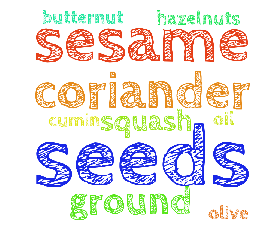

In [179]:
from os import path
from wordcloud import WordCloud
from flask import Flask, render_template
import tempfile

# d = path.dirname(__file__)

# # Read the whole text.
# text = open(path.join(d, 'constitution.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

# plt.imshow(wordcloud)
# plt.axis("off")

# fig = plt.figure(dpi = 300, figsize=(8,5))
# axes = fig.add_subplot(1, 1, 1)
    
# lower max_font_size
# wordcloud = WordCloud(max_font_size=40,background_color='white').generate(text)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

# wordcloud = WordCloud(
#                       font_path='/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/recipeApp/Fonts/CabinSketch-Bold.ttf',
# #                       stopwords=STOPWORDS,
#                       background_color='white',
#                       width=800,
#                       height=800
#                      ).generate(' '.join(vocabulary))

wordcloud = WordCloud(
                      font_path='/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/recipe-suggester_App/Fonts/CabinSketch-Bold.ttf',
#                       stopwords=STOPWORDS,
                      background_color='white',
                      width=800,
                      height=800
                     ).generate(text)

figpath = '/Users/hrm/Documents/Dropbox/DSrelated/Metis/recipes/recipe-suggester_App/static/temp/'
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig(figpath + 'figures_squash'+'.png', dpi=300)
plt.show()

# f = tempfile.NamedTemporaryFile(
# dir='static/temp',
# suffix='.png',delete=False)
# save the figure to the temporary file
# f=figpath+'figures.png'
# plt.savefig(f)
# plt.savefig(f,dpi=300)
# f.close() # close the file
    
# get the file's name (rather than the whole path)
# (the template will need that)
plotPng = 'figures.png' #f.name.split('/')[-1]
# return(render_template('figures.png',y=y,figJS=figJS,figDiv=figDiv,plotPng=plotPng))

In [1552]:
# wordcloud.words_

In [ ]:
# DF2[DF2.title=='Slime bug cups'].ingred2
# 8131    [, sweets tips, ]
# Name: ingred2, dtype: object

In [207]:
# w2v = word2vec.Word2Vec(DF.ingredTokens,size=222 ,min_count=20, workers=3, seed=2222)

# w2v = word2vec.Word2Vec(DF2.ingredTokens,size=320 ,min_count=0.2, window=3, workers=3, seed=2222)
# w2v = word2vec.Word2Vec(DF2.ingredLems,size=250, min_count=0.2, window=2, workers=3, seed=2222 )

# w2v = word2vec.Word2Vec(DF2.ingredLems,size=240, min_count=0.25, window=6, workers=3, seed=2222 ) ###
w2vINGR = word2vec.Word2Vec(DF2.ingredLems,size=300, min_count=0.25, window=3, workers=3, seed=2222 )


# w2v = word2vec.Word2Vec(DF2.ingredLems2,size=10 ,min_count=.2, window=5, workers=3, seed=2222)
# w2v = word2vec.Word2Vec(DF2.ingred3,size=100 ,min_count=0.2, window=2, workers=3, seed=1234)


2017-02-13 02:36:47,546 : INFO : collecting all words and their counts
2017-02-13 02:36:47,547 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-02-13 02:36:47,577 : INFO : PROGRESS: at sentence #10000, processed 169431 words, keeping 2770 word types
2017-02-13 02:36:47,578 : INFO : collected 2782 word types from a corpus of 171030 raw words and 10081 sentences
2017-02-13 02:36:47,579 : INFO : Loading a fresh vocabulary
2017-02-13 02:36:47,586 : INFO : min_count=0 retains 2782 unique words (100% of original 2782, drops 0)
2017-02-13 02:36:47,587 : INFO : min_count=0 leaves 171030 word corpus (100% of original 171030, drops 0)
2017-02-13 02:36:47,594 : INFO : deleting the raw counts dictionary of 2782 items
2017-02-13 02:36:47,595 : INFO : sample=0.001 downsamples 88 most-common words
2017-02-13 02:36:47,596 : INFO : downsampling leaves estimated 114029 word corpus (66.7% of prior 171030)
2017-02-13 02:36:47,596 : INFO : estimated required memory for 2782 w

In [ ]:
## w2vINGR.save('w2vIngrd_s320_minC20pcent_window3.model')

# w2vINGR.save('w2vIngrd_s300_minC20pcent_window3.model')

# 2016-11-11 05:13:42,475 : INFO : saving Word2Vec object under w2vIngrd_s300_minC20pcent_window3.model, separately None
# 2016-11-11 05:13:42,486 : INFO : not storing attribute cum_table
# 2016-11-11 05:13:42,487 : INFO : not storing attribute syn0norm
# 2016-11-11 05:13:42,588 : INFO : saved w2vIngrd_s300_minC20pcent_window3.model

In [208]:
[(i,round(v*1000)/1000) for i,v in w2vINGR.most_similar(positive=['rice'], topn=10)]  # 'beansprout','pad'
# [(i,v) for i,v in w2vINGR.most_similar(positive=['rice'], topn=10) if i not in words2ignore]

2017-02-13 02:36:52,654 : INFO : precomputing L2-norms of word weight vectors


[('basmati', 0.947),
 ('noodle', 0.912),
 ('long-grain', 0.865),
 ('risotto', 0.86),
 ('sushi', 0.843),
 ('vermicelli', 0.838),
 ('jasmine', 0.837),
 ('oyster', 0.83),
 ('tamarind', 0.822),
 ('teriyaki', 0.816)]

In [209]:
[(i,round(v*1000)/1000) for i,v in w2vINGR.most_similar(positive=['chilli'], topn=10)]  #
# [(i,v) for i,v in w2vINGR.most_similar(positive=['chocolate'], topn=10) if i not in words2ignore]

[('flake', 0.908),
 ('coriander', 0.9),
 ('chipotle', 0.891),
 ("bird's-eye", 0.884),
 ('harissa', 0.871),
 ('paprika', 0.857),
 ('lemongrass', 0.847),
 ('chickpea', 0.847),
 ('green', 0.846),
 ('curry', 0.841)]

In [210]:
[(i,round(v*1000)/1000) for i,v in w2vINGR.most_similar(positive=['flour'], topn=10)] 
# [(i,v) for i,v in w2vINGR.most_similar(positive=['flour'], topn=10) if i not in words2ignore]

[('yeast', 0.932),
 ('self-raising', 0.931),
 ('farl', 0.892),
 ('polenta', 0.891),
 ('semolina', 0.887),
 ('soda', 0.872),
 ('egg', 0.872),
 ('bicarbonate-soda', 0.87),
 ('cornmeal', 0.865),
 ('suet', 0.856)]

In [211]:
# w2vINGR.most_similar(positive=['egg'], topn=10)
[(i,round(v*1000)/1000) for i,v in w2vINGR.most_similar(positive=['egg'], topn=10)] 

[('egg-yolk', 0.954),
 ('yolk', 0.934),
 ('egg-white', 0.927),
 ('white', 0.92),
 ('self-raising', 0.919),
 ('buttermilk', 0.913),
 ('semi-skimmed', 0.89),
 ('choic', 0.89),
 ('polenta', 0.888),
 ('suet', 0.881)]

In [212]:
[(i,round(v*1000)/1000) for i,v in w2vINGR.most_similar(positive=['lamb'], topn=10)]  

[('leg', 0.964),
 ('mince', 0.954),
 ('boned', 0.932),
 ('steak', 0.914),
 ('okra', 0.912),
 ('romano', 0.912),
 ('saddle', 0.906),
 ('duck', 0.905),
 ('turkey', 0.897),
 ('shoulder', 0.897)]

In [252]:
[(i,round(v*1000)/1000) for i,v in w2vINGR.most_similar(positive=['pea'], topn=10)]

[('broad', 0.929),
 ('frozen', 0.897),
 ('sweetcorn', 0.893),
 ('snap', 0.888),
 ('garlic-infused', 0.862),
 ('petits', 0.844),
 ('cupful', 0.839),
 ('shoot', 0.822),
 ('teacup', 0.816),
 ('seafood', 0.809)]

In [ ]:
#'4x175-200g/6-7oz' #'100-150g/4-5½','fillet','5mm-thick','2-3kg'

In [214]:
[(i,round(v*1000)/1000) for i,v in w2vINGR.most_similar(positive=['strawberry'], topn=10)]

[('raspberry', 0.984),
 ('blueberry', 0.982),
 ('blackberry', 0.98),
 ('punnet', 0.974),
 ('jam', 0.972),
 ('passion', 0.969),
 ('mascarpone', 0.963),
 ('doily', 0.963),
 ('bitter', 0.958),
 ('curd', 0.955)]

In [215]:

# cosine dist
w2vINGR.n_similarity(['orange'],['lemon'])

# w2v.doesnt_match("egg flour semolina buttermilk".split())


0.85024113031598558

In [216]:
w2vINGR.n_similarity(['tofu'],['miso'])


0.97889407287626296

In [217]:
w2vINGR.n_similarity(['salmon'],['miso'])


0.56028329836331525

In [305]:
w2v.index2word

['oil',
 'sugar',
 'olive',
 'onion',
 'butter',
 'egg',
 'garlic',
 'clove',
 'juice',
 'lemon',
 'flour',
 'leaf',
 'caster',
 'tomato',
 'fresh',
 'cream',
 'ground',
 'chilli',
 'milk',
 'zest',
 'vegetable',
 'chicken',
 'seed',
 'stock',
 'coriander',
 'golden',
 'vinegar',
 'wine',
 'potato',
 'parsley',
 'sauce',
 'ginger',
 'pepper',
 'lime',
 'double',
 'vanilla',
 'spring',
 'rice',
 'slice',
 'orange',
 'chocolate',
 'thyme',
 'green',
 'bean',
 'frozen',
 'cheese',
 'piece',
 'bread',
 'carrot',
 'pinch',
 'icing',
 'almond',
 'soft',
 'wedge',
 'mint',
 'cinnamon',
 'black',
 'cherry',
 'dark',
 'honey',
 'brown',
 'cumin',
 'self-raising',
 'stick',
 'basil',
 'paste',
 'crème',
 'pea',
 'bay',
 'shallot',
 'soy',
 'fraîche',
 'baby',
 'unsalted',
 'muscovado',
 'bacon',
 'salt',
 'beef',
 'pastry',
 'yogurt',
 'fat',
 'pork',
 'mustard',
 'fillet',
 'spinach',
 'sweet',
 'syrup',
 'water',
 'clear',
 'coconut',
 'sesame',
 'breadcrumb',
 'nut',
 'mushroom',
 'lamb',
 's

In [482]:
# iList = ['polenta','cornmeal','milk','hake','pollack','mackerel','cod','rice','flour','bean',
#         'corn','quinoa','bread','apple','orange','lime','lemon','coriander','cornflour','cayenne',
#         'chilli', 'sauce','cream','mascarpone','herb','salad','basil','pesto','tarragon','rocket',
#         'parsley','tomato','aubergine','courgette','artichoke','sausage','peach','fruit','jam','apricot',
#         'blueberry','strawberry','kiwi','nut','walnut','almond','pistachio','sultana','pecan','noodle']

In [42]:
len(w2v.index2word)

2756

In [1705]:
ListC = [w for w in w2vINGR.index2word if w not in words2ignore]
len(ListC)
# len(words2ignore)

2504

In [681]:
# len(set(w2v.index2word).difference(words2ignore))

In [682]:
# len(w2v['pasta'])

In [1706]:
#rows -- ingred -- cols == values for each dim

# test = pd.DataFrame([w2v['flour'], 
#                      w2v['rice'], 
#                      w2v['mackerel'],
#                      w2v['green']]) ## conver to dense array...?

all_iList=[]

#for ii in iList:
# for ii in iList2:
for ii in ListC:    
    all_iList.append(w2v[ii])
    


In [1707]:
test= pd.DataFrame(all_iList )

In [1708]:
test[test.isnull().any(axis=1) ]

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239


In [ ]:
print(w2v.similarity('lemon','orange'))

In [487]:
# cosine dist
w2v.n_similarity(['orange'],['lemon'])

0.81576306770498741

In [ ]:
w2v.doesnt_match("egg flour semolina buttermilk".split())

In [309]:
len(test)

2594

http://jakevdp.github.io/blog/2014/01/10/d3-plugins-truly-interactive/  

In [47]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# import mpld3

# mpld3.enable_notebook()

http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html  
https://github.com/oreillymedia/t-SNE-tutorial  
https://www.quora.com/How-do-I-visualise-word2vec-word-vectors   


In [1709]:
## CRASHES
print(__doc__)
from time import time

# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)


Automatically created module for IPython interactive environment


In [1750]:
## CRASHES

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0, verbose=2)
t0 = time()
Ingred_tsne = tsne.fit_transform(test)

# plot_embedding(Ingred_tsne,
#                "t-SNE embedding of the digits (time %.2fs)" %
#                (time() - t0))

# plt.show()


Computing t-SNE embedding
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2504
[t-SNE] Computed conditional probabilities for sample 2000 / 2504
[t-SNE] Computed conditional probabilities for sample 2504 / 2504
[t-SNE] Mean sigma: 0.026282
[t-SNE] Iteration 25: error = 1.7634653, gradient norm = 0.0186537
[t-SNE] Iteration 50: error = 1.7203854, gradient norm = 0.0191277
[t-SNE] Iteration 75: error = 1.4851600, gradient norm = 0.0082303
[t-SNE] Iteration 100: error = 1.4485751, gradient norm = 0.0122114
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.448575
[t-SNE] Iteration 125: error = 1.3913786, gradient norm = 0.0056490
[t-SNE] Iteration 150: error = 1.3836031, gradient norm = 0.0099228
[t-SNE] Iteration 175: error = 1.3792498, gradient norm = 0.0106708
[t-SNE] Iteration 200: error = 1.3829628, gradient norm = 0.0106222
[t-SNE] Iteration 225: error = 1.3739551, gradi

In [308]:
len(Ingred_tsne)

2594

In [ ]:
## matplot lib vis

In [1752]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1],X[i, 2] )#,
#         plt.text(X[i, 0], X[i, 1] , str(digits.target[i]) ,
#                  color=plt.cm.Set1(y[i] / 10.),
#                  fontdict={'weight': 'bold', 'size': 9})

#     if hasattr(offsetbox, 'AnnotationBbox'):
#         # only print thumbnails with matplotlib > 1.0
#         shown_images = np.array([[1., 1.]])  # just something big
#         for i in range(digits.data.shape[0]):
#             dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
#             shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)


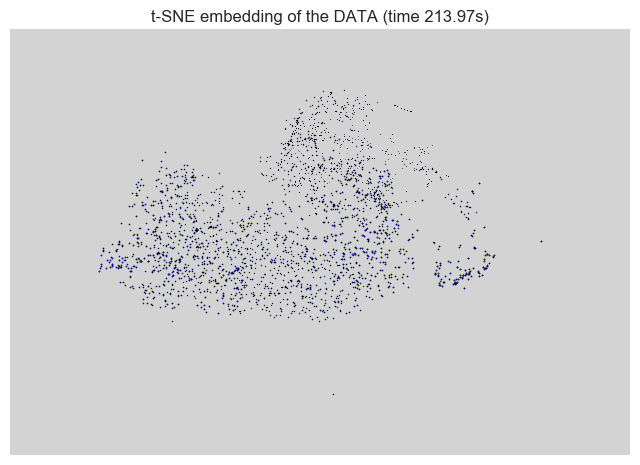

In [1753]:
# plt.figure(figsize=[15,15])
plot_embedding(Ingred_tsne,
               "t-SNE embedding of the DATA (time %.2fs)" %
               (time() - t0))

plt.show()


https://github.com/oreillymedia/t-SNE-tutorial  

Would be nice if it worked -- it essentially goes through each iteration of the tsne n makes a time-lapse to show how the clusters form...


In [ ]:
# import sys
# import codecs
# import numpy as np
# import matplotlib.pyplot as plt
 
# from sklearn.manifold import TSNE
 
 
# def main():
 
#     embeddings_file = sys.argv[1]
#     wv, vocabulary = load_embeddings(embeddings_file)
 
#     tsne = TSNE(n_components=2, random_state=0)
#     np.set_printoptions(suppress=True)
#     Y = tsne.fit_transform(wv[:1000,:])
 
#     plt.scatter(Y[:, 0], Y[:, 1])
#     for label, x, y in zip(vocabulary, Y[:, 0], Y[:, 1]):
#         plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.show()
 
 
# def load_embeddings(file_name):
 
#     with codecs.open(file_name, 'r', 'utf-8') as f_in:
#         vocabulary, wv = zip(*[line.strip().split(' ', 1) for line in 
# f_in])
#     wv = np.loadtxt(wv)
#     return wv, vocabulary
 
# if __name__ == '__main__':
#     main()

In [1756]:
# vocabulary = iList2

def simpleplot_withLabels(Y, vocab):
    plt.scatter(Y[:, 0], Y[:, 1])
    for label, x, y in zip(vocabulary, Y[:, 0], Y[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.show()
    

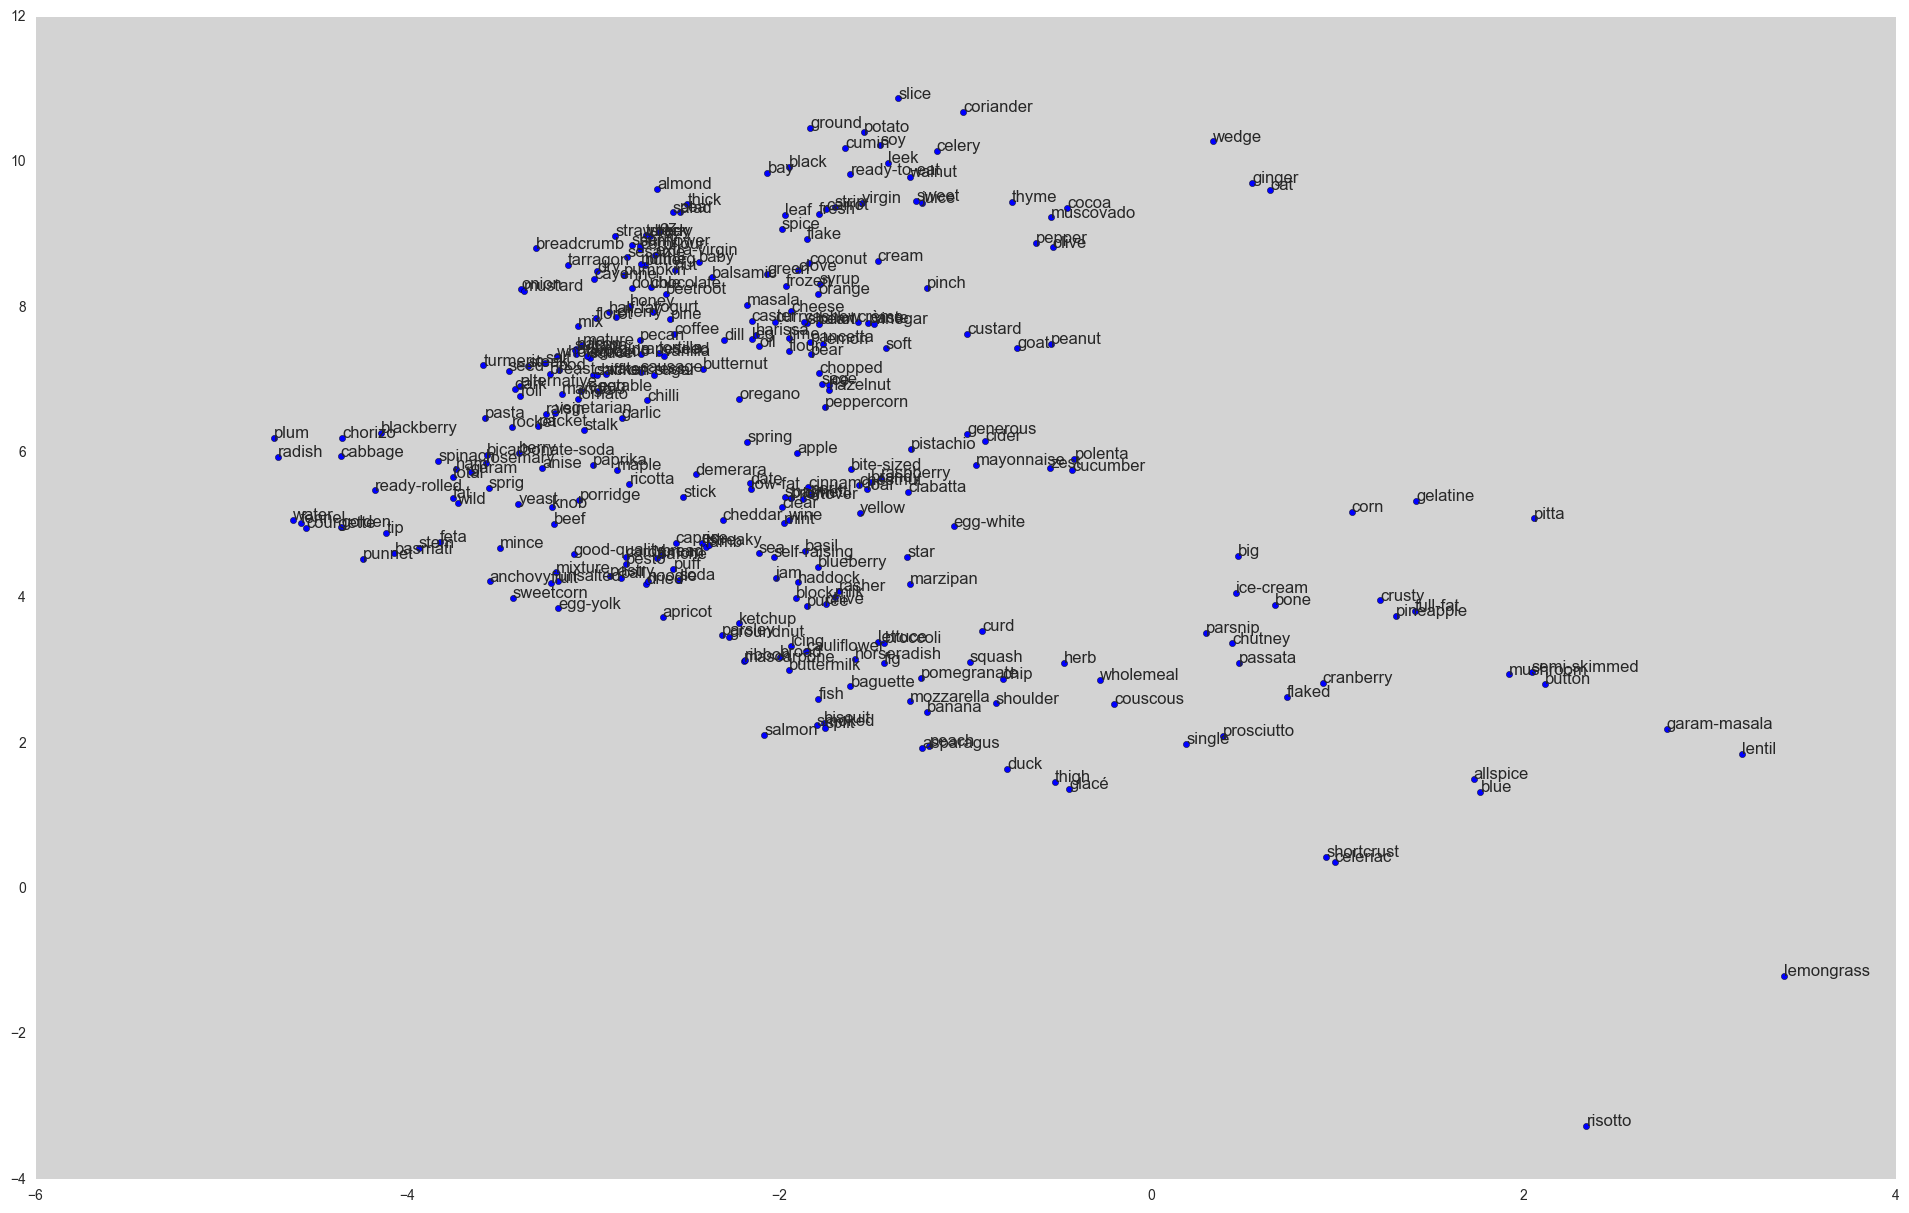

In [1757]:
vocabulary = ListC #iList2

plt.figure(figsize=[24,15])
simpleplot_withLabels(Ingred_tsne[500:800], vocabulary[500:800])

In [54]:
# TextBlob(','.join(vocabulary)).tags

http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html  
https://blog.dominodatalab.com/topology-and-density-based-clustering/  
https://www.quora.com/How-do-I-visualise-word2vec-word-vectors  

In [55]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# X = test

In [ ]:
# X = Ingred_tsne*10000

In [1729]:
X = StandardScaler().fit_transform(Ingred_tsne)#(Ingred_tsne*10000)
# X = StandardScaler().fit_transform(test)#*1000 

In [1730]:
X

array([[ 1.3746246 , -0.81093794],
       [ 1.88012071,  1.48564052],
       [ 1.52911691, -0.75207406],
       ..., 
       [-0.5826079 ,  0.12034336],
       [-0.82189226,  0.64964786],
       [-1.77194834, -1.06225469]])

In [1738]:
# Compute DBSCAN
# db = DBSCAN(eps=0.3, min_samples=20).fit(X)

# db = DBSCAN(eps=0.131125, min_samples=20).fit(X)
# db = DBSCAN(eps=0.12235, min_samples=18).fit(X)
# db = DBSCAN(eps=0.110, min_samples=15).fit(X)

# db = DBSCAN(eps=0.12250, min_samples=15).fit(X)
# db = DBSCAN(eps=0.122250, min_samples=15).fit(X)
db = DBSCAN(eps=0.1450, min_samples=20).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Estimated number of clusters: 18
Silhouette Coefficient: -0.053


In [1739]:
core_samples_mask

array([ True, False, False, ...,  True,  True,  True], dtype=bool)

In [142]:
# xy = X[class_member_mask & core_samples_mask]
len(list(labels)), np.unique(labels)

(2756,
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21]))

In [167]:
labels
vocabulary[n]
# ['list',1,2]

'chicken'

In [170]:
# cluster_color[n]
n

22

In [1747]:
[vocabulary[n], labels[n], cluster_color[labels[n]]]

['freerange',
 13,
 [0.61222608358252284, 0.84382930573295145, 0.64398310464971209]]

/Users/hrm/anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


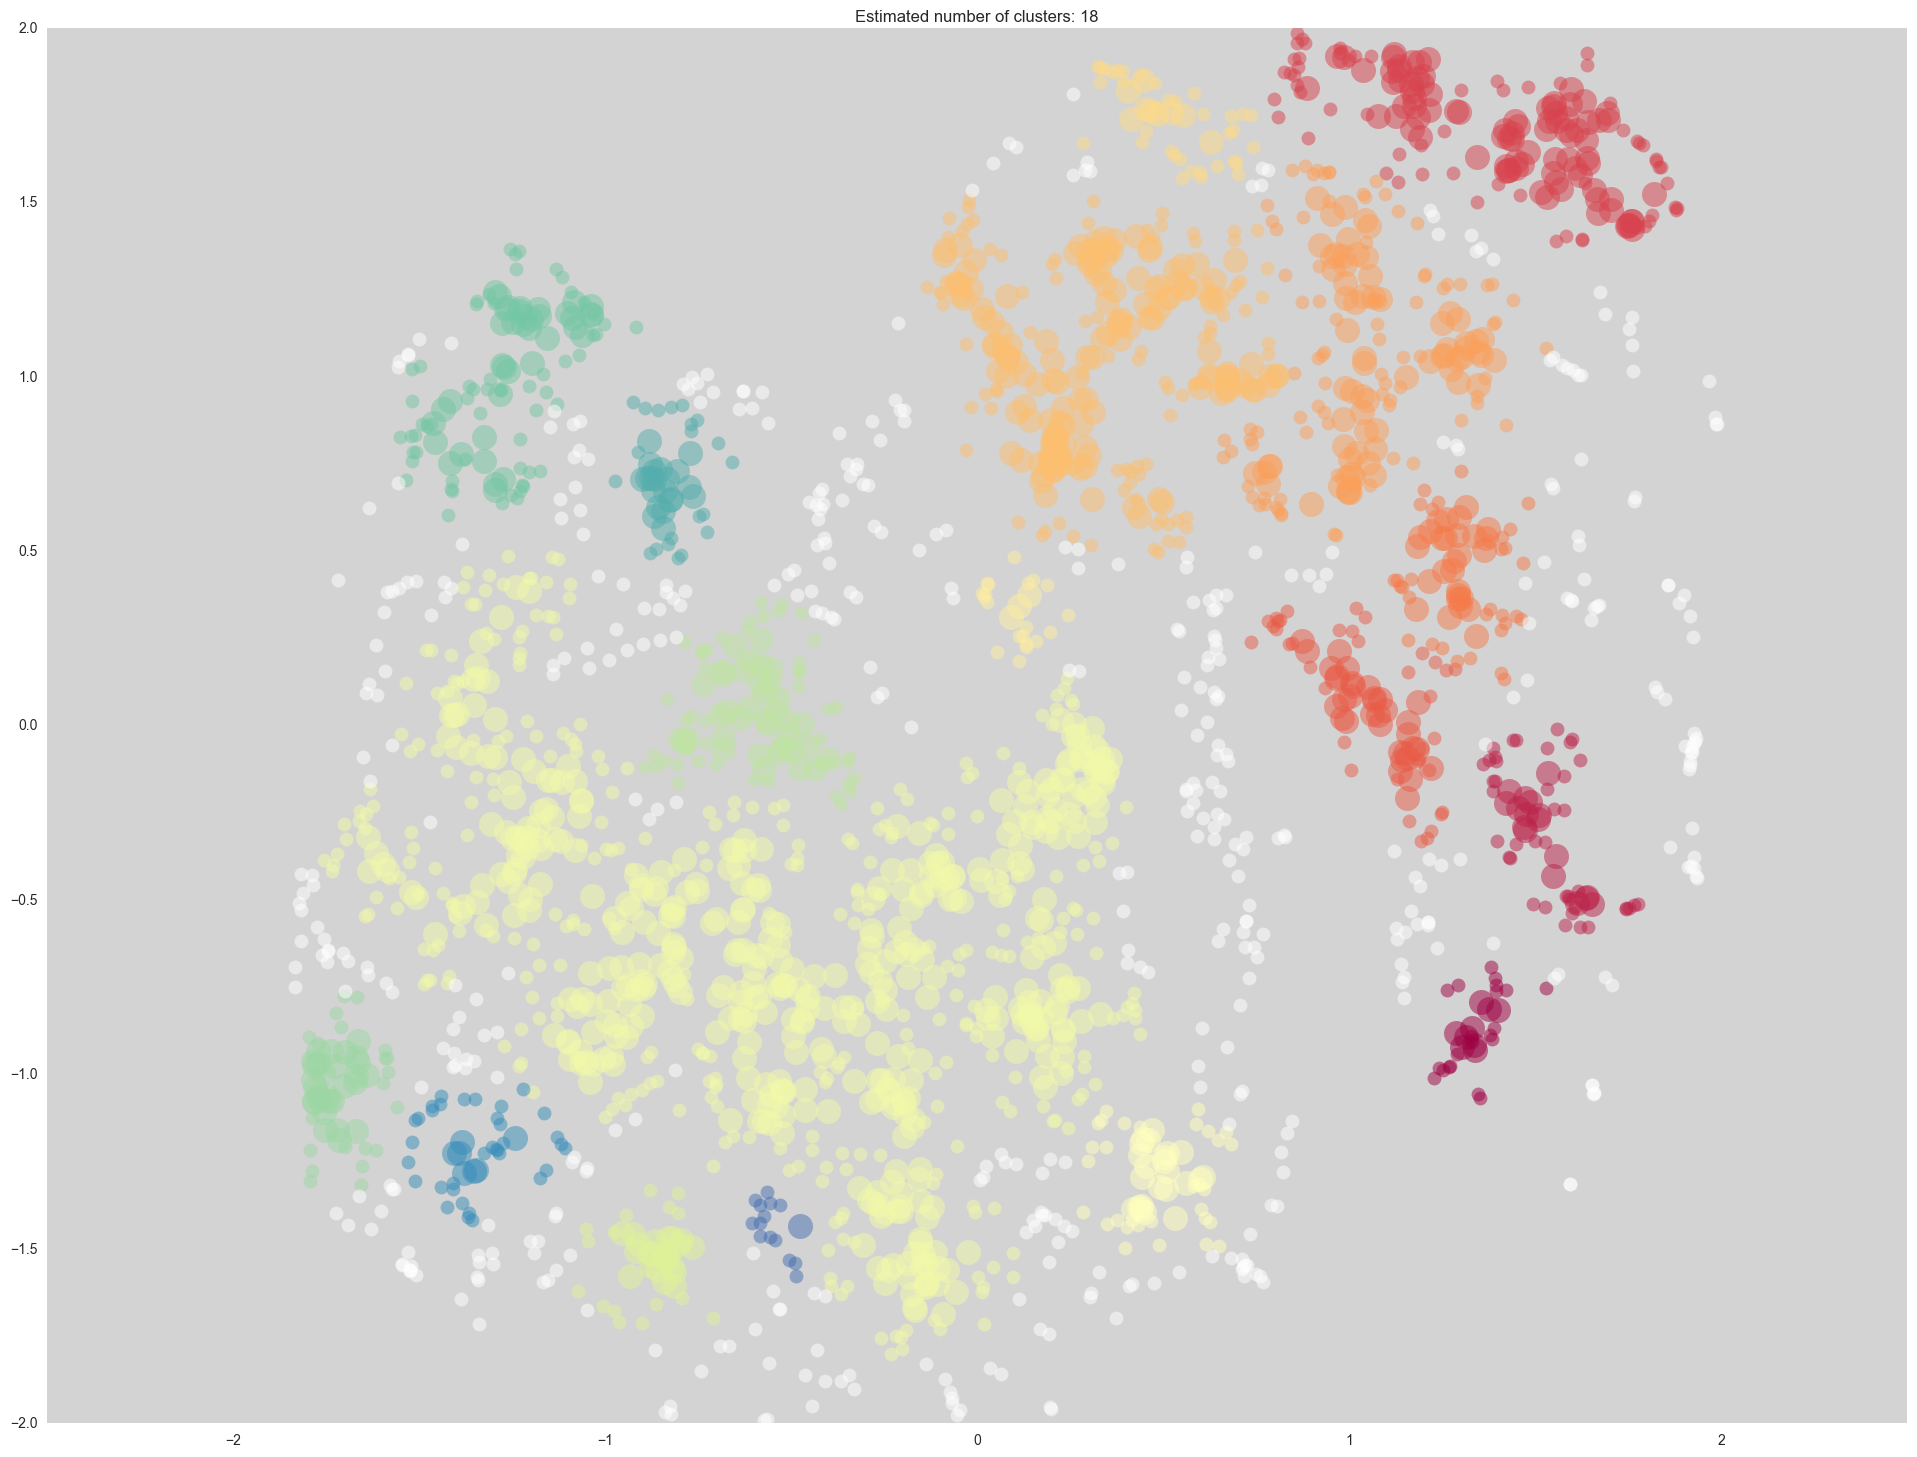

In [1741]:
# import matplotlib.pyplot as plt
sns.set(rc={'axes.facecolor':'lightgrey'}) #, 'figure.facecolor':'cornflowerblue'})
new_style = {'grid': False}
matplotlib.rc('axes', **new_style)

plt.figure(figsize=[24,18])
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'w'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
#     xy = X[core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='w', markersize=18, alpha =0.5)

    xy = X[class_member_mask & ~core_samples_mask]
#     xy = X[core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='w', markersize=10, alpha =0.5)
    
    plt.xlim([-2.5, 2.5])

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [1742]:
# [list(i)[:3] for i in colors]
# class_member_mask
cluster_color = dict(zip(unique_labels, [list(i)[:3] for i in colors]))


In [1743]:
data=[]
for n in range(len(labels)):
    data.append([vocabulary[n], labels[n], cluster_color[labels[n]]])
    

In [352]:
'16-18' in words2ignore

False

In [1744]:
WclusterDF = pd.DataFrame(data, columns = ['ingredient','cluster','colorRGB'])

In [687]:
# WclusterDF[WclusterDF.cluster==-1]

In [1745]:
len(WclusterDF[WclusterDF.cluster==-1])

498

In [ ]:
# http://bl.ocks.org/weiglemc/6185069
# http://bl.ocks.org/peterssonjonas/4a0e7cb8d23231243e0e

# http://bl.ocks.org/hlvoorhees/5986172

In [1746]:
WclusterDF[WclusterDF.ingredient=='rice']

,ingredient,cluster,colorRGB
37,rice,-1,"[0.368627458811, 0.309803932905, 0.635294139385]"


In [367]:
# WclusterDF[WclusterDF.cluster==-1]

In [699]:

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# digits = datasets.load_digits(n_class=6)
# X = digits.data
# y = digits.target
# n_samples, n_features = X.shape
# n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1])
#         plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
#                  color=plt.cm.Set1(y[i] / 10.),
#                  fontdict={'weight': 'bold', 'size': 9})

#     if hasattr(offsetbox, 'AnnotationBbox'):
#         # only print thumbnails with matplotlib > 1.0
#         shown_images = np.array([[1., 1.]])  # just something big
#         for i in range(digits.data.shape[0]):
#             dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
#             shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)



Automatically created module for IPython interactive environment


In [692]:
X= test

Computing PCA projection


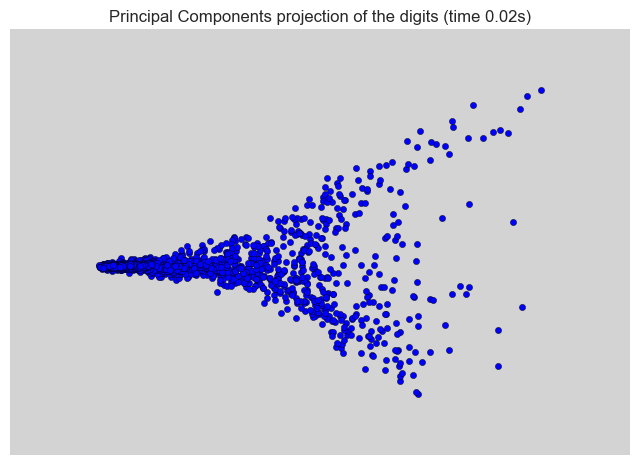

In [700]:

# #----------------------------------------------------------------------
# # Random 2D projection using a random unitary matrix
# print("Computing random projection")
# rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
# X_projected = rp.fit_transform(X)
# plot_embedding(X_projected, "Random Projection of the digits")


# #----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components
# 
# print("Computing Linear Discriminant Analysis projection")
# X2 = X.copy()
# X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
# t0 = time()
# X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
# plot_embedding(X_lda,
#                "Linear Discriminant projection of the digits (time %.2fs)" %
#                (time() - t0))


# #----------------------------------------------------------------------
# # Isomap projection of the digits dataset
# print("Computing Isomap embedding")
# t0 = time()
# X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
# print("Done.")
# plot_embedding(X_iso,
#                "Isomap projection of the digits (time %.2fs)" %
#                (time() - t0))


# #----------------------------------------------------------------------
# # Locally linear embedding of the digits dataset
# print("Computing LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='standard')
# t0 = time()
# X_lle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_lle,
#                "Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


# #----------------------------------------------------------------------
# # Modified Locally linear embedding of the digits dataset
# print("Computing modified LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='modified')
# t0 = time()
# X_mlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_mlle,
#                "Modified Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


# #----------------------------------------------------------------------
# # HLLE embedding of the digits dataset
# print("Computing Hessian LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='hessian')
# t0 = time()
# X_hlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_hlle,
#                "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


# #----------------------------------------------------------------------
# # LTSA embedding of the digits dataset
# print("Computing LTSA embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='ltsa')
# t0 = time()
# X_ltsa = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_ltsa,
#                "Local Tangent Space Alignment of the digits (time %.2fs)" %
#                (time() - t0))

# #----------------------------------------------------------------------
# # MDS  embedding of the digits dataset
# print("Computing MDS embedding")
# clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
# t0 = time()
# X_mds = clf.fit_transform(X)
# print("Done. Stress: %f" % clf.stress_)
# plot_embedding(X_mds,
#                "MDS embedding of the digits (time %.2fs)" %
#                (time() - t0))

# #----------------------------------------------------------------------
# # Random Trees embedding of the digits dataset
# print("Computing Totally Random Trees embedding")
# hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
#                                        max_depth=5)
# t0 = time()
# X_transformed = hasher.fit_transform(X)
# pca = decomposition.TruncatedSVD(n_components=2)
# X_reduced = pca.fit_transform(X_transformed)

# plot_embedding(X_reduced,
#                "Random forest embedding of the digits (time %.2fs)" %
#                (time() - t0))

# #----------------------------------------------------------------------
# # Spectral embedding of the digits dataset
# print("Computing Spectral embedding")
# embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
#                                       eigen_solver="arpack")
# t0 = time()
# X_se = embedder.fit_transform(X)

# plot_embedding(X_se,
#                "Spectral embedding of the digits (time %.2fs)" %
#                (time() - t0))

# #----------------------------------------------------------------------
# # t-SNE embedding of the digits dataset
# print("Computing t-SNE embedding")
# tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
# t0 = time()
# X_tsne = tsne.fit_transform(X)

# plot_embedding(X_tsne,
#                "t-SNE embedding of the digits (time %.2fs)" %
#                (time() - t0))

# plt.show()


In [701]:
# X_pca